In [1]:
import pandas as pd 
import numpy as np 
import extract_vector as ev
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
def clean_train_data(train_data, train_label):
    """
    Input: train_data,train_label 
    Ouput: train_data,train_label 
           updated train data and updated train label after removing the nan rows
    """
    n = train_data.shape[0]
    m = train_data.shape[1]
    nan_ll = []
    for i in range(n):
        if(np.isnan(np.sum(train_data[i:i+1, :]))):
            nan_ll.append(i)

    train_data = np.delete(train_data, nan_ll, 0)
    train_label = np.delete(train_label, nan_ll, 0)
    return train_data, train_label

In [3]:
def get_train_labels(train_label):
    for i in train_label:
        if(i[0] > 4.5):
            i[0] = 1
        else:
            i[0] = 0

        if(i[1] > 4.5):
            i[1] = 1
        else:
            i[1] = 0
    return train_label

In [4]:
def get_emotion_label(labels):
    emo = []
    for i in labels:
        if(i[0] == 0 and i[1] == 0):
            emo.append(0)
        elif(i[0] == 1 and i[1] == 0):
            emo.append(1)
        elif(i[0] == 0 and i[1] == 1):
            emo.append(2)
        elif(i[0] == 1 and i[1] == 1):
            emo.append(3)
    return emo

In [5]:
cv = ShuffleSplit(n_splits=5,test_size=0.3,random_state=42)

## Wavelet Entropy Model

In [6]:
train_data = ev.getWaveletEntropyData()
train_label = ev.getLabelData(type='ValAr')

In [7]:
train_data,train_label = clean_train_data(train_data,train_label)
train_label = get_train_labels(train_label)
arousal_label = train_label[:,0]
valence_label = train_label[:,1]

In [8]:
sm1 = SMOTE()
sm2 = SMOTE()
train_a_data,arousal_label = sm1.fit_resample(train_data,arousal_label)
train_v_data,valence_label = sm2.fit_resample(train_data,valence_label)

In [9]:
x_a_train,x_a_test,y_a_train,y_a_test = train_test_split(train_a_data,arousal_label,test_size = 0.3,random_state = 42)
x_v_train,x_v_test,y_v_train,y_v_test = train_test_split(train_v_data,valence_label,test_size = 0.3,random_state = 42)

### Arousal

In [10]:
arousal_model = SVC(kernel='rbf',C = 100)

In [11]:
arousal_model.fit(x_a_train,y_a_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
pred0 = arousal_model.predict(x_a_test)

In [13]:
print(classification_report(pred0,y_a_test))

              precision    recall  f1-score   support

         0.0       0.89      0.72      0.79       182
         1.0       0.68      0.86      0.76       123

    accuracy                           0.78       305
   macro avg       0.78      0.79      0.78       305
weighted avg       0.80      0.78      0.78       305



In [14]:
print(accuracy_score(pred0,y_a_test))

0.7770491803278688


In [15]:
print(classification_report(pred0,y_a_test))

              precision    recall  f1-score   support

         0.0       0.89      0.72      0.79       182
         1.0       0.68      0.86      0.76       123

    accuracy                           0.78       305
   macro avg       0.78      0.79      0.78       305
weighted avg       0.80      0.78      0.78       305



In [16]:
confusion_matrix(pred0,y_a_test)

array([[131,  51],
       [ 17, 106]])

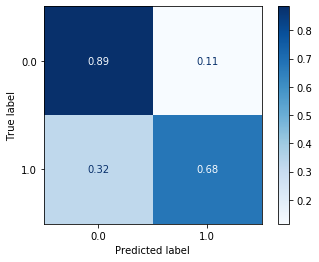

In [17]:
plot_confusion_matrix(arousal_model,x_a_test,y_a_test,normalize='true',cmap=plt.cm.Blues)

### Valence

In [18]:
valence_model = SVC(kernel='rbf',C = 100)

In [19]:
valence_model.fit(x_v_train,y_v_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
pred1 = valence_model.predict(x_v_test)

In [21]:
print(classification_report(pred1,y_v_test))

              precision    recall  f1-score   support

         0.0       0.73      0.59      0.65       170
         1.0       0.49      0.65      0.56       105

    accuracy                           0.61       275
   macro avg       0.61      0.62      0.61       275
weighted avg       0.64      0.61      0.62       275



In [22]:
print(accuracy_score(pred1,y_v_test))

0.610909090909091


In [23]:
confusion_matrix(pred1,y_v_test)

array([[100,  70],
       [ 37,  68]])

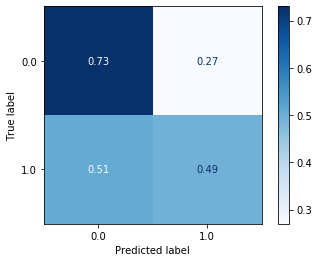

In [24]:
plot_confusion_matrix(valence_model,x_v_test,y_v_test,normalize='true',cmap=plt.cm.Blues)

### Emotion

In [25]:
# true_emotion = get_emotion_label(y_test)

In [26]:
# pred_emotion = np.array(list(zip(pred0,pred1)))
# pred_emotion = get_emotion_label(pred_emotion)

In [27]:
# confusion_matrix(true_emotion,pred_emotion)

In [28]:
# accuracy_score(true_emotion,pred_emotion)

## Fourier Entropy Model

In [29]:
train_data = ev.getFourierEntropyData()
train_label = ev.getLabelData(type='ValAr')

In [30]:
train_data,train_label = clean_train_data(train_data,train_label)
train_label = get_train_labels(train_label)
arousal_label = train_label[:,0]
valence_label = train_label[:,1]

In [31]:
sm1 = SMOTE()
sm2 = SMOTE()
train_a_data,arousal_label = sm1.fit_resample(train_data,arousal_label)
train_v_data,valence_label = sm2.fit_resample(train_data,valence_label)

In [32]:
x_a_train,x_a_test,y_a_train,y_a_test = train_test_split(train_a_data,arousal_label,test_size = 0.3,random_state = 42)
x_v_train,x_v_test,y_v_train,y_v_test = train_test_split(train_v_data,valence_label,test_size = 0.3,random_state = 42)

### Arousal

In [33]:
arousal_model = SVC(kernel='rbf',C = 100)

In [34]:
arousal_model.fit(x_a_train,y_a_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [35]:
pred0 = arousal_model.predict(x_a_test)

In [36]:
print(classification_report(pred0,y_a_test))

              precision    recall  f1-score   support

         0.0       0.78      0.69      0.73       169
         1.0       0.66      0.76      0.71       136

    accuracy                           0.72       305
   macro avg       0.72      0.73      0.72       305
weighted avg       0.73      0.72      0.72       305



In [37]:
print(accuracy_score(pred0,y_a_test))

0.7213114754098361


In [38]:
confusion_matrix(pred0,y_a_test)

array([[116,  53],
       [ 32, 104]])

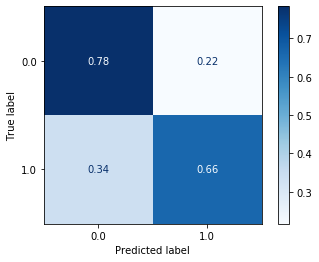

In [39]:
plot_confusion_matrix(arousal_model,x_a_test,y_a_test,normalize='true',cmap=plt.cm.Blues)

### Valence

In [40]:
cross_val_score(SVC(),train_v_data,valence_label,scoring='accuracy',cv=cv)

array([0.60363636, 0.55636364, 0.6       , 0.58909091, 0.56363636])

In [41]:
valence_model = SVC(kernel='rbf',C = 100)

In [42]:
valence_model.fit(x_v_train,y_v_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [43]:
pred1 = valence_model.predict(x_v_test)

In [44]:
print(classification_report(pred1,y_v_test))

              precision    recall  f1-score   support

         0.0       0.72      0.64      0.68       152
         1.0       0.61      0.68      0.64       123

    accuracy                           0.66       275
   macro avg       0.66      0.66      0.66       275
weighted avg       0.67      0.66      0.66       275



In [45]:
print(accuracy_score(pred1,y_v_test))

0.6618181818181819


In [46]:
confusion_matrix(pred1,y_v_test)

array([[98, 54],
       [39, 84]])

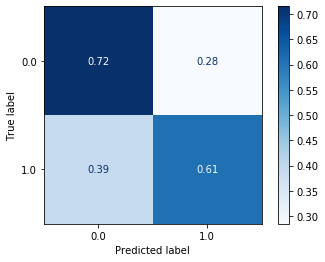

In [47]:
plot_confusion_matrix(valence_model,x_v_test,y_v_test,normalize='true',cmap=plt.cm.Blues)

### Emotion

In [48]:
# true_emotion = get_emotion_label(y_test)

In [49]:
# pred_emotion = np.array(list(zip(pred0,pred1)))
# pred_emotion = get_emotion_label(pred_emotion)

In [50]:
# cm = confusion_matrix(true_emotion,pred_emotion)
# cm

In [51]:
# accuracy_score(true_emotion,pred_emotion)